In [1]:
from sklearn import svm, datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits

In [2]:
digits = load_digits()
df = pd.DataFrame(digits.data, columns = digits.feature_names)
df['number'] = digits.target
df['number'] = df['number'].apply(lambda x: digits.target_names[x])
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,number
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [3]:
from sklearn.model_selection import train_test_split

In [6]:
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.1)

In [7]:
len(x_test)

180

In [26]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [27]:
knn.score(x_test, y_test)

0.9833333333333333

In [28]:
from sklearn.metrics import confusion_matrix

y_pred = knn.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[19,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 14,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 18,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 14,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 20,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 15,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 24,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 17,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0, 18,  0],
       [ 0,  1,  0,  0,  0,  1,  0,  0,  0, 18]], dtype=int64)

<Axes: >

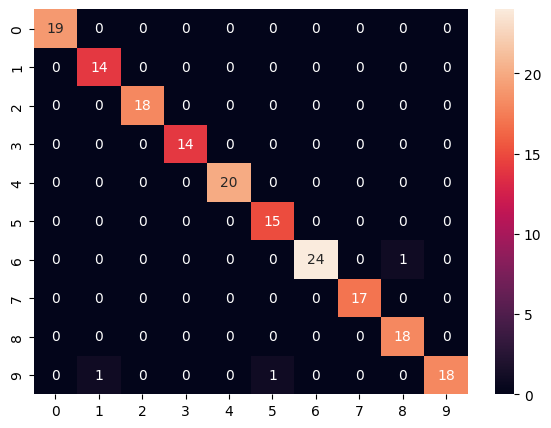

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
plt.figure(figsize=(7,5))
sb.heatmap(cm, annot=True)

In [30]:
from sklearn.metrics import classification_report

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.93      1.00      0.97        14
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        14
           4       1.00      1.00      1.00        20
           5       0.94      1.00      0.97        15
           6       1.00      0.96      0.98        25
           7       1.00      1.00      1.00        17
           8       0.95      1.00      0.97        18
           9       1.00      0.90      0.95        20

    accuracy                           0.98       180
   macro avg       0.98      0.99      0.98       180
weighted avg       0.98      0.98      0.98       180

